## Welcome to **Gold Standard**!
This notebook provides a walkthrough for **importing, tidying, and visualizing** data from the [**2008 Summer Olympic Games**](https://edjnet.github.io/OlympicsGoNUTS/2008/) in Beijing. Install the necessary dependencies and download the adapted data by following the instructions on [**Github**](https://github.com/annamccartan3/MCCARTAN-Data-Science-Portfolio/tree/main/TidyData-Project). Then return here to explore the top performers of 2008!

### Why Tidy Data?
The initial dataset exists in a **wide format**, with each event listed as a separate column. To facilitate effective analysis and visualization, we need to reshape it into a **long format** following the principles of Tidy Data. By restructuring our dataset, we will make it easier to filter and group the information in Python.

### Load Libraries & Data
We'll use the **Pandas** library to manipulate our dataset. Refer to the [**Pandas Cheat Sheet**](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for tips on modifying the dataframe.

In [ ]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import untidy dataset
olympic_df = pd.read_csv('data/olympics08.csv')

### Data Exploration
- Examine the **structure and features** of the olympics08.csv file.
- View **summary statistics** using Pandas functions.
- Check for **missing values** before proceeding with data transformation.

#### Useful Pandas Functions:
- `df.head()` → View the first 5 rows of the dataframe
- `df.describe()` → Summary statistics for numerical columns
- `df.isnull().sum()` → Count missing values in each column

In [1]:
# view the first 5 rows of the df
olympic_df.head()

NameError: name 'olympic_df' is not defined

In [ ]:
print(f"Summary Statistics:")

# check total number of athletes/events
print(f"Total athletes: {len(olympic_df)}")
print(f"Total events: {len(olympic_df.columns)}")

# view summary statistics
olympic_df.describe()

Summary Statistics:
Total athletes: 1875
Total events: 71


,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
count,1875,11,9,85,81,12,10,72,35,36,...,6,36,36,39,39,24,21,28,16,27
unique,1875,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,Aaron Armstrong,bronze,bronze,silver,silver,silver,silver,silver,bronze,bronze,...,gold,bronze,gold,silver,gold,gold,bronze,bronze,bronze,bronze
freq,1,4,4,31,28,4,4,24,12,12,...,2,12,12,13,13,8,7,14,8,13


In [ ]:
# check for missing values
print("Missing Values:")
olympic_df.isnull().sum()

Missing Values:


medalist_name                    0
male_archery                  1864
female_archery                1866
male_athletics                1790
female_athletics              1794
                              ... 
male_weightlifting            1851
female_weightlifting          1854
male_freestyle wrestling      1847
female_freestyle wrestling    1859
male_greco-roman wrestling    1848
Length: 71, dtype: int64

### Initial Observations:
- Each row represents an **athlete**, and each column represents an **event**
- A total of 1875 athletes and 71 events are recorded
- Data is **categorical**, meaning athletes either won a medal (`gold`, `silver`, `bronze`) or did not (`NaN`).

### Issues with the Raw Data:
The raw dataset is **not in a tidy format**:
- **Column headers are values instead of variable names** → Each event has its own column.
- **Multiple variables stored in one column** → Gender and sport are combined in column names.

### Data Tidying
To follow **Tidy Data Principles**, we must reshape the dataset from **wide format** to **long format**.

#### Key Steps:
- **Convert event columns into a single variable** → Use `pd.melt()` to create a new column for event type
- **Separate gender information** → Extract `male` and `female` labels into a new column using `str.split()`

**Why do this?**
- Easier to **filter, group, and analyze** medal distributions
- Enables **aggregation** (e.g., total medals by country or event)
- Compatible with data **visualization** in Seaborn

In [ ]:
# get a list of event columns (excluding medalist name)
events_list = list(olympic_df.columns)[1:]

# use pd.melt() to convert "wide" data to "long" data
olympic_df_melted = pd.melt(olympic_df,
                            id_vars="medalist_name",
                            value_vars=events_list,
                            var_name="Event",
                            value_name="Medal")

olympic_df_melted.head()

# use str.split() to separate the 'event' column into men's vs. women's events
olympic_df_melted[['Gender', 'Event']] = olympic_df_melted['Event'].str.split('_', expand=True)

# create a cleaned copy of the dataset
olympic_df_clean = olympic_df_melted.copy()

# display the cleaned dataset
olympic_df_clean

,medalist_name,Event,Medal,Gender
0,Aaron Armstrong,archery,NaN,male
1,Aaron Peirsol,archery,NaN,male
2,Abdullo Tangriev,archery,NaN,male
3,Abeer Abdelrahman,archery,NaN,male
4,Abhinav,archery,NaN,male
...,...,...,...,...
131245,Éver Banega,greco-roman wrestling,NaN,male
131246,Ólafur Stefánsson,greco-roman wrestling,NaN,male
131247,Óscar Brayson,greco-roman wrestling,NaN,male
131248,Łukasz Pawłowski,greco-roman wrestling,NaN,male



## Aggregation

### Pivot-Table
We can use the `pivot_table()` function to aggregate the tidied data and compare total medals earned across various events and genders. 

In [ ]:
# use pivot_table() to break down total medal count by event
olympic_df_clean.pivot_table(index="Event", 
                             columns="Medal", 
                             values="medalist_name", 
                             aggfunc="count", 
                             fill_value=0)

Medal,bronze,gold,silver
Event,,,
archery,8,5,7
artistic gymnastics,19,14,16
association football,36,37,36
athletics,55,52,59
badminton,7,7,8
baseball,24,24,24
basketball,24,23,24
beach volleyball,4,4,4
bmx,2,2,2


In [ ]:
# use pivot_table() to aggregate by gender, event, and medal type
olympic_df_clean.pivot_table(index="Event",
                              columns=["Gender", "Medal"],
                              values="medalist_name",
                              aggfunc="count")

Gender                female                male             
Medal                 bronze  gold silver bronze  gold silver
Event                                                        
archery                  4.0   2.0    3.0    4.0   3.0    4.0
artistic gymnastics      7.0   7.0    6.0   12.0   7.0   10.0
association football    18.0  18.0   18.0   18.0  19.0   18.0
athletics               26.0  27.0   28.0   29.0  25.0   31.0
badminton                3.0   3.0    4.0    4.0   4.0    4.0
baseball                 NaN   NaN    NaN   24.0  24.0   24.0
basketball              12.0  12.0   12.0   12.0  11.0   12.0
beach volleyball         2.0   2.0    2.0    2.0   2.0    2.0
bmx                      1.0   1.0    1.0    1.0   1.0    1.0
boxing                   NaN   NaN    NaN   22.0  11.0   11.0
canoeing and kayaking    8.0   7.0    6.0   19.0  17.0   17.0
diving                   6.0   2.0    5.0    5.0   5.0    6.0
equestrian sport         9.0   4.0    7.0    5.0   7.0    6.0
fencing                  5.0  11.0   10.0   10.0   7.0   11.0
field hockey            16.0  16.0   16.0   17.0  17.0   16.0
freestyle wrestling      8.0   4.0    4.0   14.0   7.0    7.0
greco-roman wrestling    NaN   NaN    NaN   13.0   7.0    7.0
handball                14.0  14.0   14.0   14.0  15.0   14.0
judo                    14.0   7.0    7.0   14.0   7.0    7.0
modern pentathlon        NaN   1.0    1.0    1.0   1.0    1.0
mountain biking          1.0   1.0    1.0    1.0   1.0    1.0
rhythmic gymnastics      7.0   7.0    7.0    NaN   NaN    NaN
road bicycle racing      2.0   2.0    2.0    2.0   1.0    2.0
rowing                  18.0  20.0   20.0   27.0  28.0   28.0
sailing                  7.0   7.0    7.0   11.0  11.0   11.0
shooting sport           6.0   6.0    5.0    9.0   8.0    9.0
softball                15.0  15.0   15.0    NaN   NaN    NaN
swimming                22.0  21.0   20.0   21.0  18.0   23.0
synchronized swimming   11.0   9.0    9.0    NaN   NaN    NaN
table tennis             4.0   1.0    4.0    4.0   1.0    4.0
taekwondo                8.0   4.0    4.0    8.0   4.0    4.0
tennis                   3.0   3.0    3.0    3.0   3.0    3.0
track cycling            3.0   3.0    3.0   13.0   8.0   14.0
trampoline gymnastics    1.0   1.0    1.0    1.0   1.0    1.0
triathlon                1.0   1.0    1.0    1.0   1.0    1.0
volleyball              12.0  12.0   12.0   12.0  12.0   12.0
water polo              13.0  13.0   13.0   13.0  13.0   13.0
weightlifting            7.0   7.0    7.0    8.0   8.0    8.0

## Visualization

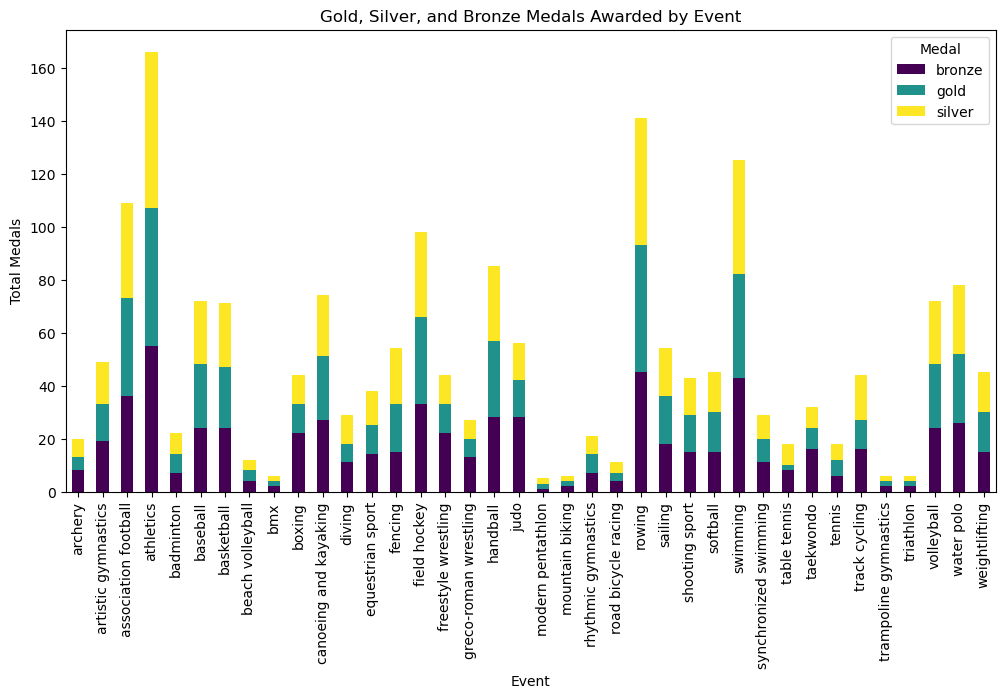

In [ ]:
# visualize gold, silver, and bronze medals awarded by event
medal_counts = olympic_df_clean.pivot_table(index="Event", columns="Medal", values="medalist_name", aggfunc="count", fill_value=0)

medal_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.ylabel("Total Medals")
plt.title("Gold, Silver, and Bronze Medals Awarded by Event")
plt.show()

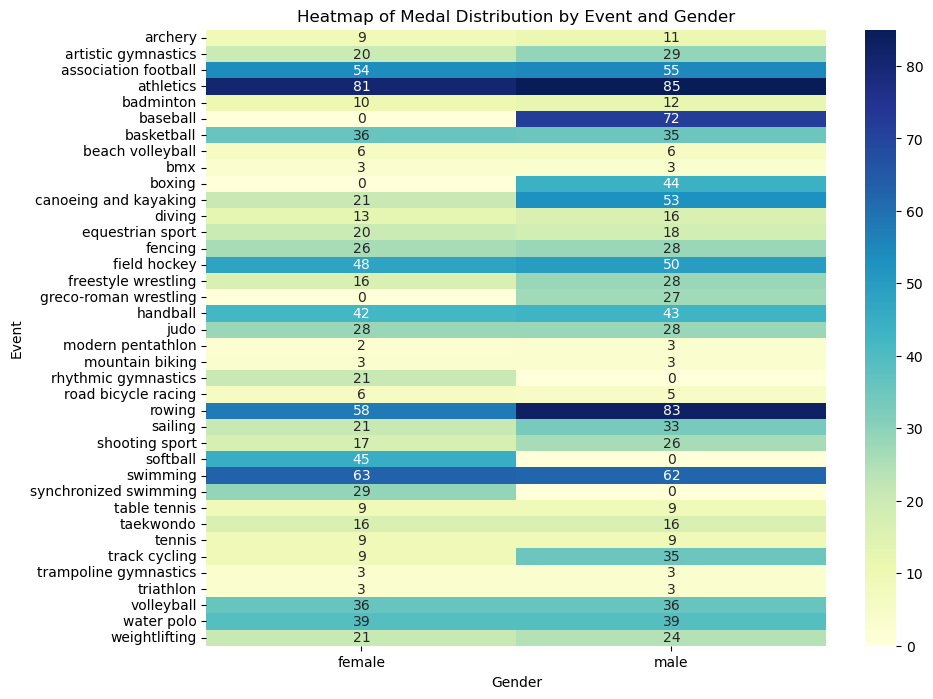

In [ ]:
# visualize medal counts by gender and event
heatmap_data = olympic_df_clean.pivot_table(index="Event", columns="Gender", values="Medal", aggfunc="count", fill_value=0)

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel("Gender")
plt.ylabel("Event")
plt.title("Heatmap of Medal Distribution by Event and Gender")
plt.show()

### Export Cleaned Data

In [ ]:
# export tidied dataset
olympic_df_clean.to_csv('data/olympics08_cleaned.csv')